In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import boston_housing

In [2]:
# Load dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# Data Overview
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (404, 13)
Test Data Shape: (102, 13)


In [3]:
# Summary of the target variable
print("Train Targets:")
print(f"Mean: {np.mean(train_targets)}, Std: {np.std(train_targets)}")

Train Targets:
Mean: 22.395049504950492, Std: 9.199035423364862


In [4]:
# Combine data into a single DataFrame for easier exploration
columns = [
    "CRIM",  # Per capita crime rate by town
    "ZN",    # Proportion of residential land zoned for lots > 25,000 sq.ft.
    "INDUS", # Proportion of non-retail business acres per town
    "CHAS",  # Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    "NOX",   # Nitric oxides concentration (parts per 10 million)
    "RM",    # Average number of rooms per dwelling
    "AGE",   # Proportion of owner-occupied units built prior to 1940
    "DIS",   # Weighted distances to five Boston employment centers
    "RAD",   # Index of accessibility to radial highways
    "TAX",   # Full-value property tax rate per $10,000
    "PTRATIO",  # Pupil-teacher ratio by town
    "B",       # 1000(Bk - 0.63)^2, where Bk is the proportion of Black people by town
    "LSTAT"    # % lower status of the population
]

In [5]:
# Create DataFrame for training and testing data
train_df = pd.DataFrame(train_data, columns=columns)
train_df["Target"] = train_targets

test_df = pd.DataFrame(test_data, columns=columns)
test_df["Target"] = test_targets

In [6]:
# Inspect the first few rows
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [7]:
# Check for missing values
print("\nMissing values in train data:\n", train_df.isnull().sum())



Missing values in train data:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64


In [8]:
# Summary statistics of features
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817,22.395050
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545,9.210442
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000,16.675000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000,20.750000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


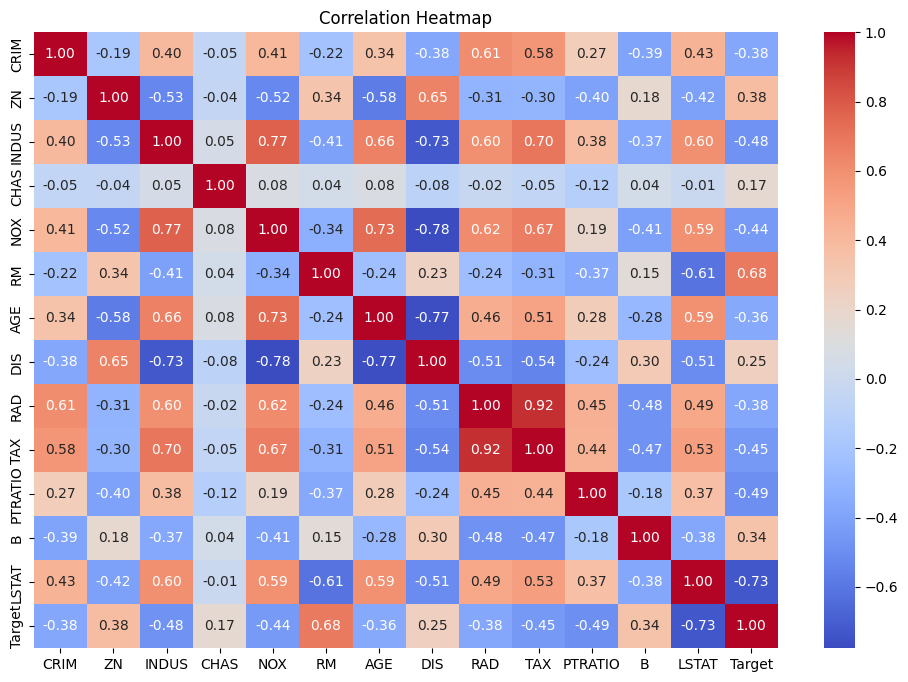

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

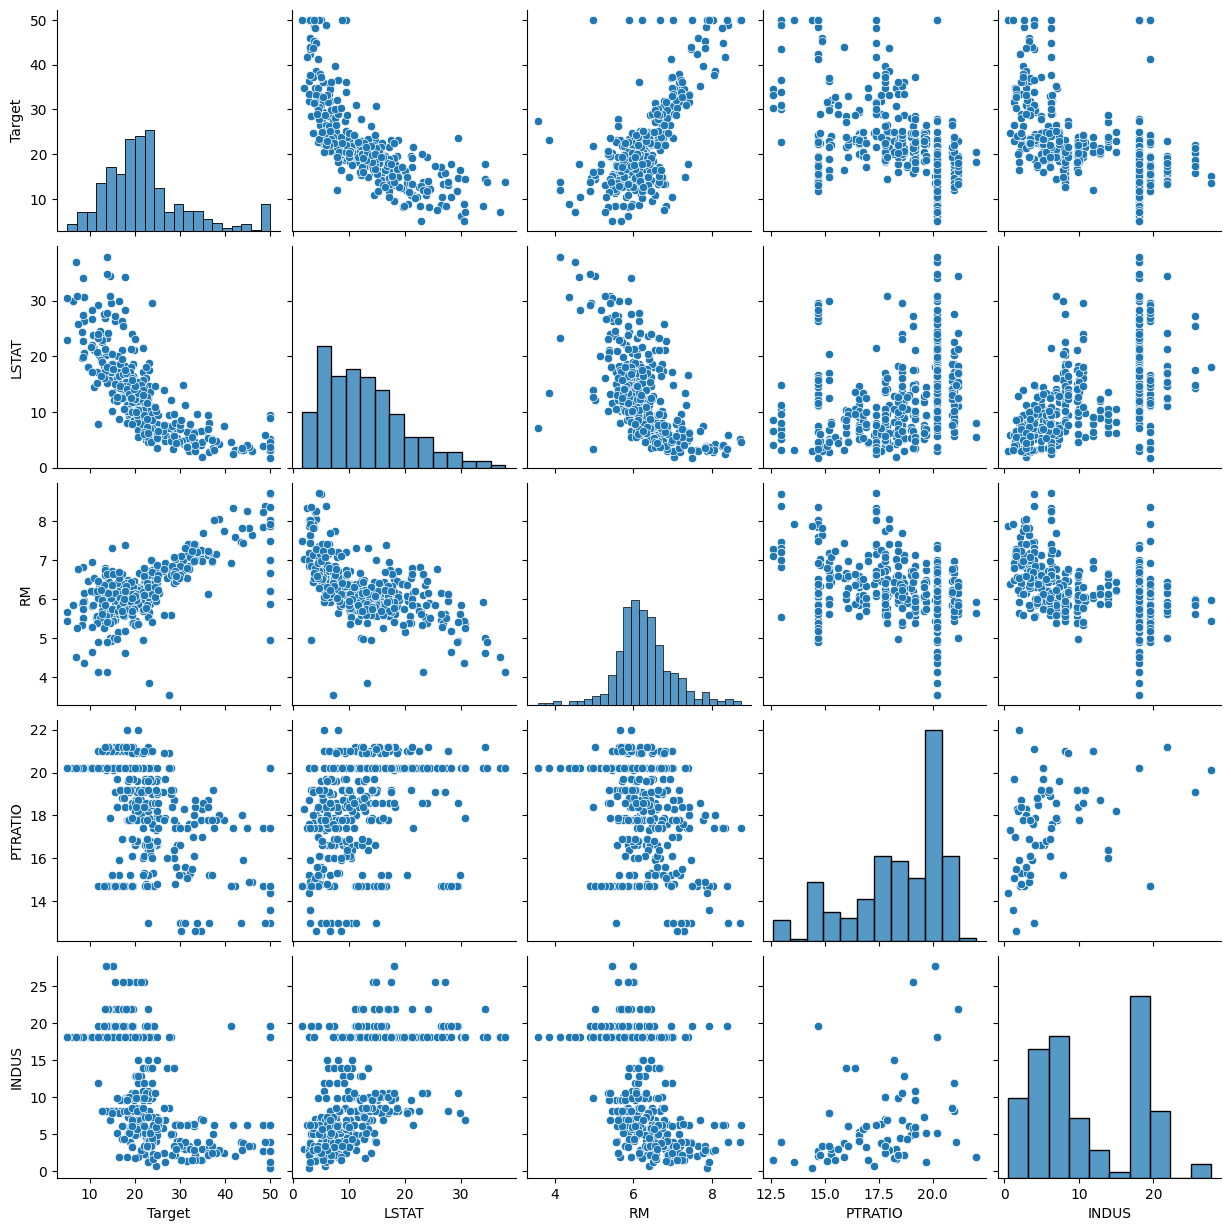

In [10]:
# Pairplot for top correlated features with Target
top_corr_features = correlation_matrix["Target"].abs().sort_values(ascending=False).head(5).index
sns.pairplot(train_df[top_corr_features])
plt.show()

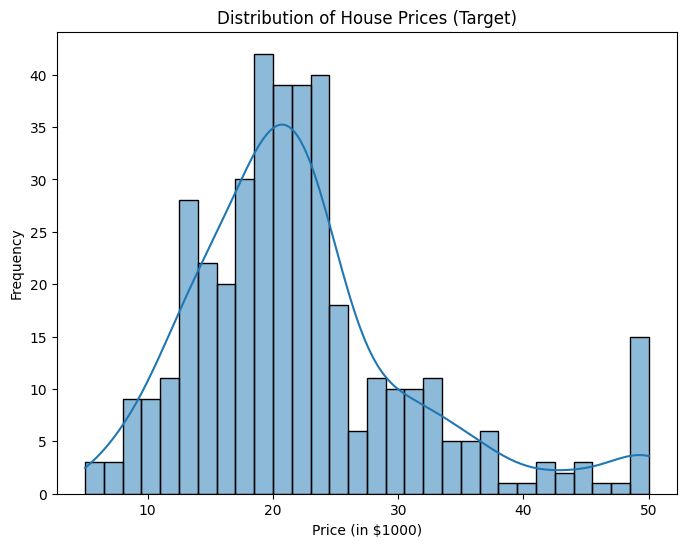

In [11]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_targets, kde=True, bins=30)
plt.title("Distribution of House Prices (Target)")
plt.xlabel("Price (in $1000)")
plt.ylabel("Frequency")
plt.show()

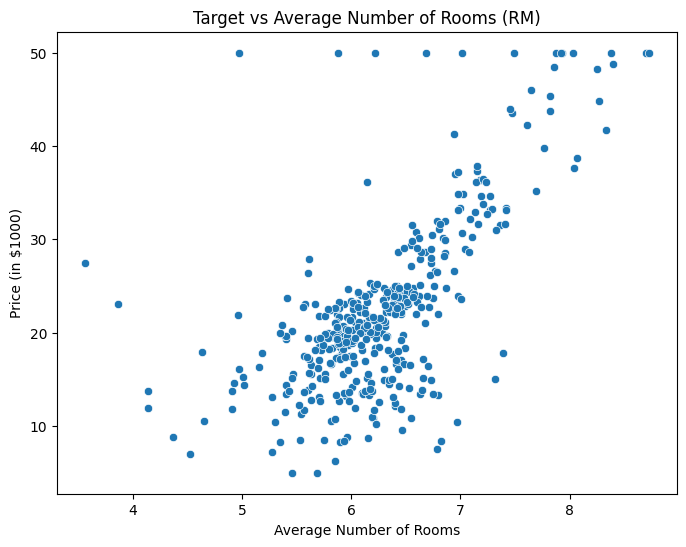

In [12]:
# Feature Analysis: RM (Average number of rooms)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="RM", y="Target", data=train_df)
plt.title("Target vs Average Number of Rooms (RM)")
plt.xlabel("Average Number of Rooms")
plt.ylabel("Price (in $1000)")
plt.show()

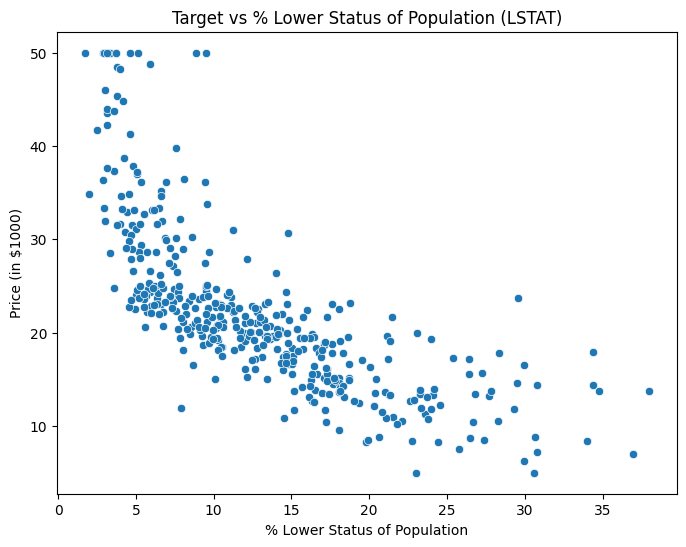

In [13]:
# Feature Analysis: LSTAT (% lower status of the population)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="LSTAT", y="Target", data=train_df)
plt.title("Target vs % Lower Status of Population (LSTAT)")
plt.xlabel("% Lower Status of Population")
plt.ylabel("Price (in $1000)")
plt.show()


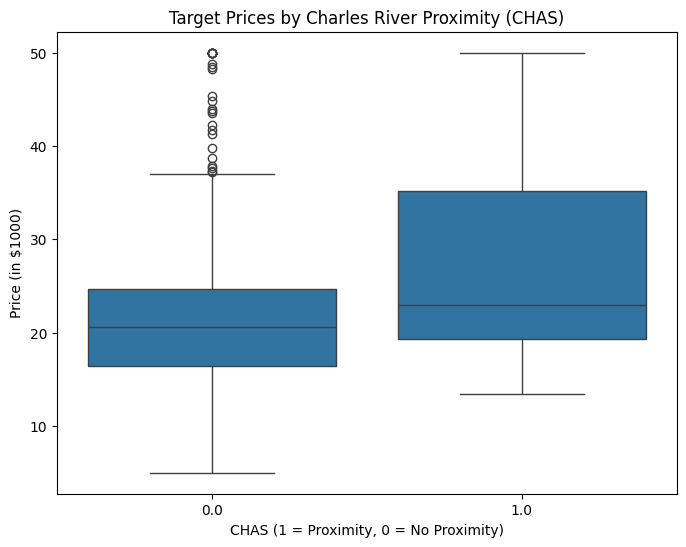

In [14]:
# Analyze Categorical Feature: CHAS (Charles River proximity)
plt.figure(figsize=(8, 6))
sns.boxplot(x="CHAS", y="Target", data=train_df)
plt.title("Target Prices by Charles River Proximity (CHAS)")
plt.xlabel("CHAS (1 = Proximity, 0 = No Proximity)")
plt.ylabel("Price (in $1000)")
plt.show()

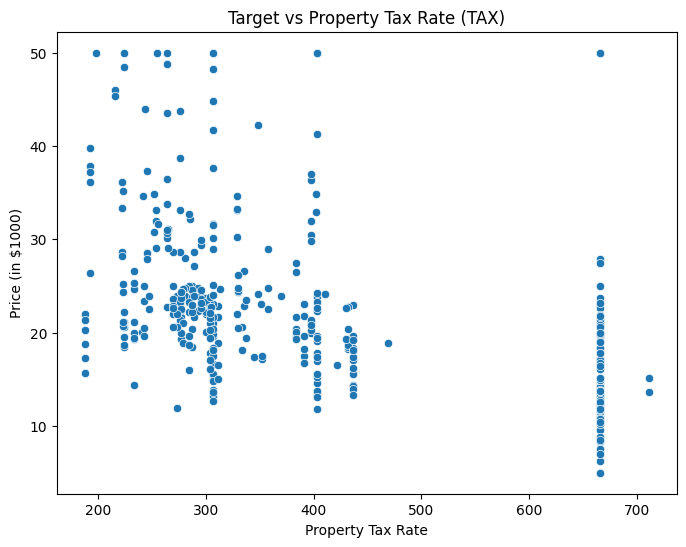

In [15]:
# Tax Rates vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x="TAX", y="Target", data=train_df)
plt.title("Target vs Property Tax Rate (TAX)")
plt.xlabel("Property Tax Rate")
plt.ylabel("Price (in $1000)")
plt.show()

In [16]:
# Summary of observations
print("Key Observations:")
print("1. RM (Average number of rooms) and LSTAT (% lower status of the population) are highly correlated with target prices.")
print("2. CHAS (Charles River proximity) shows slightly higher prices for properties near the river.")
print("3. TAX (Property tax rate) does not show a strong correlation with target prices.")

Key Observations:
1. RM (Average number of rooms) and LSTAT (% lower status of the population) are highly correlated with target prices.
2. CHAS (Charles River proximity) shows slightly higher prices for properties near the river.
3. TAX (Property tax rate) does not show a strong correlation with target prices.
